# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.090010e+01     7.686537e+00
 * time: 0.0042879581451416016
     1     2.892620e+01     5.764076e+00
 * time: 0.01285099983215332
     2     2.543865e+01     8.372873e+00
 * time: 0.03390097618103027
     3     1.610525e+01     3.912760e+00
 * time: 0.05873894691467285
     4     1.263344e+01     1.895720e+00
 * time: 0.07874393463134766
     5     1.256485e+01     2.481815e+00
 * time: 0.09510493278503418
     6     1.125118e+01     1.567194e+00
 * time: 0.19547390937805176
     7     1.091468e+01     1.590430e+00
 * time: 0.21184301376342773
     8     1.050323e+01     1.684298e+00
 * time: 0.22807693481445312
     9     1.000944e+01     9.215015e-01
 * time: 0.24441790580749512
    10     9.722501e+00     1.153006e+00
 * time: 0.2605149745941162
    11     9.594439e+00     7.032075e-01
 * time: 0.2765219211578369
    12     9.514342e+00     5.569198e-01
 * time: 0.2927579879760742
    13     9.459294e+00     8.792110e-01
 * time: 

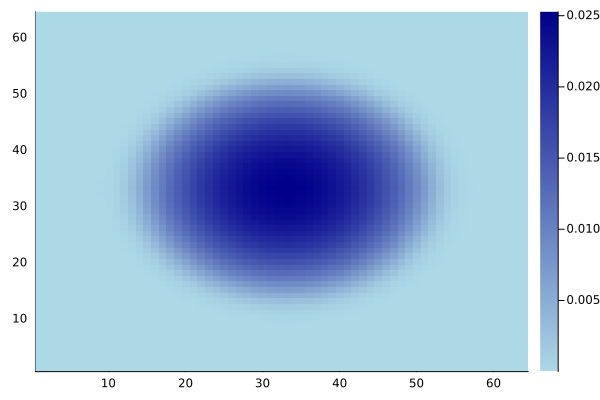

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)